<a href="https://colab.research.google.com/github/ahmedelalaoui142/Forecasting_financial_time_series/blob/main/Traiding_strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-deep')
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
stock_price =  pd.read_csv('/content/drive/MyDrive/Project_Malay/MSFT_for_project.csv',parse_dates=['Date'])


In [ ]:
stock_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2640 non-null   datetime64[ns]
 1   Open       2640 non-null   float64       
 2   High       2640 non-null   float64       
 3   Low        2640 non-null   float64       
 4   Close      2640 non-null   float64       
 5   Adj Close  2640 non-null   float64       
 6   Volume     2640 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 144.5 KB


In [ ]:
stock_price.describe()


,Date,Open,High,Low,Close,Adj Close,Volume
count,2640,"2,640.00","2,640.00","2,640.00","2,640.00","2,640.00","2,640.00"
mean,2019-03-31 01:20:43.636363776,162.19,163.76,160.57,162.25,156.56,"29,722,643.67"
min,2014-01-02 00:00:00,34.73,35.88,34.63,34.98,29.30,"7,425,600.00"
25%,2016-08-15 18:00:00,56.99,57.43,56.67,57.10,51.46,"21,383,725.00"
50%,2019-04-01 12:00:00,119.00,119.56,118.24,119.24,113.09,"26,589,650.00"
75%,2021-11-10 06:00:00,255.56,257.85,252.14,254.33,249.47,"33,890,050.00"
max,2024-06-28 00:00:00,453.07,456.17,451.77,452.85,452.04,"202,522,400.00"
std,NaN,113.88,114.94,112.76,113.92,114.68,"13,795,316.72"


In [ ]:
stock_price = stock_price[['Date','Close']]


In [ ]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2014-01-02,37.16
1,2014-01-03,36.91
2,2014-01-06,36.13
3,2014-01-07,36.41
4,2014-01-08,35.76
5,2014-01-09,35.53
6,2014-01-10,36.04
7,2014-01-13,34.98
8,2014-01-14,35.78
9,2014-01-15,36.76


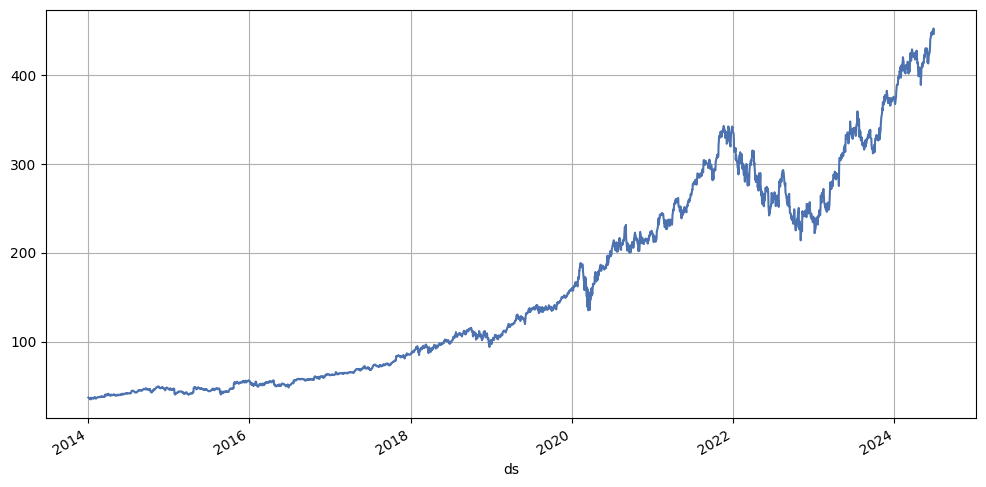

In [ ]:
stock_price.set_index('ds').y.plot(figsize=(12,6), grid=True);

In [ ]:
model = Prophet()
model.fit(stock_price)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphuu6o0ms/i_jolg5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphuu6o0ms/uw_fgfhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54736', 'data', 'file=/tmp/tmphuu6o0ms/i_jolg5u.json', 'init=/tmp/tmphuu6o0ms/uw_fgfhf.json', 'output', 'file=/tmp/tmphuu6o0ms/prophet_model534sae0f/prophet_model-20240902150817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(60, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean]

future.tail()

,ds
2693,2024-08-21
2694,2024-08-22
2695,2024-08-23
2698,2024-08-26
2699,2024-08-27


In [ ]:
future

,ds
0,2014-01-02
1,2014-01-03
2,2014-01-06
3,2014-01-07
4,2014-01-08
...,...
2693,2024-08-21
2694,2024-08-22
2695,2024-08-23
2698,2024-08-26


In [ ]:
forecast = model.predict(future)


In [ ]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2677,2024-08-21,432.59,420.26,454.23,431.90,433.73,4.39,4.39,4.39,0.38,0.38,0.38,4.01,4.01,4.01,0.00,0.00,0.00,436.97
2678,2024-08-22,432.84,420.86,454.13,432.03,434.05,4.42,4.42,4.42,0.45,0.45,0.45,3.97,3.97,3.97,0.00,0.00,0.00,437.26
2679,2024-08-23,433.09,420.01,454.31,432.10,434.38,4.46,4.46,4.46,0.54,0.54,0.54,3.92,3.92,3.92,0.00,0.00,0.00,437.55
2680,2024-08-26,433.85,421.35,455.57,432.77,435.18,4.02,4.02,4.02,0.29,0.29,0.29,3.73,3.73,3.73,0.00,0.00,0.00,437.87
2681,2024-08-27,434.11,422.09,453.96,432.93,435.51,3.88,3.88,3.88,0.25,0.25,0.25,3.63,3.63,3.63,0.00,0.00,0.00,437.99


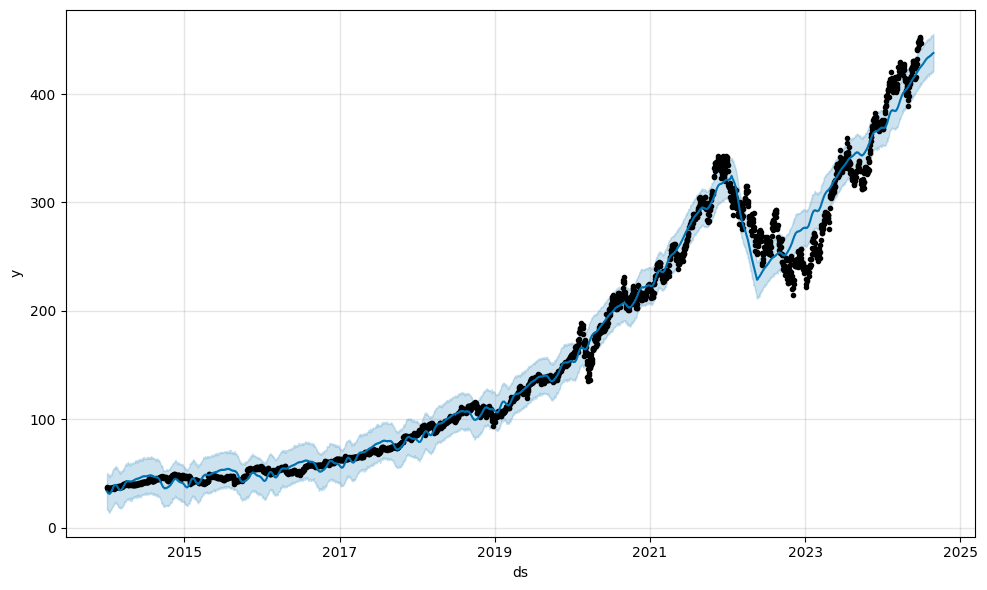

In [ ]:
model.plot(forecast);


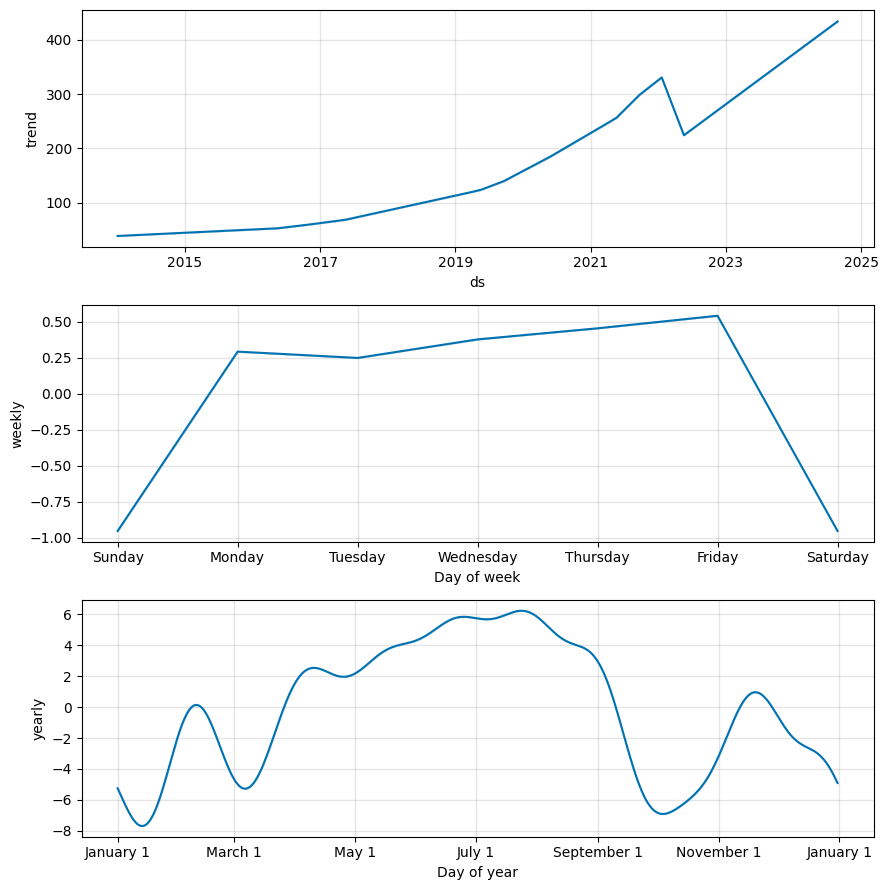

In [ ]:
model.plot_components(forecast);


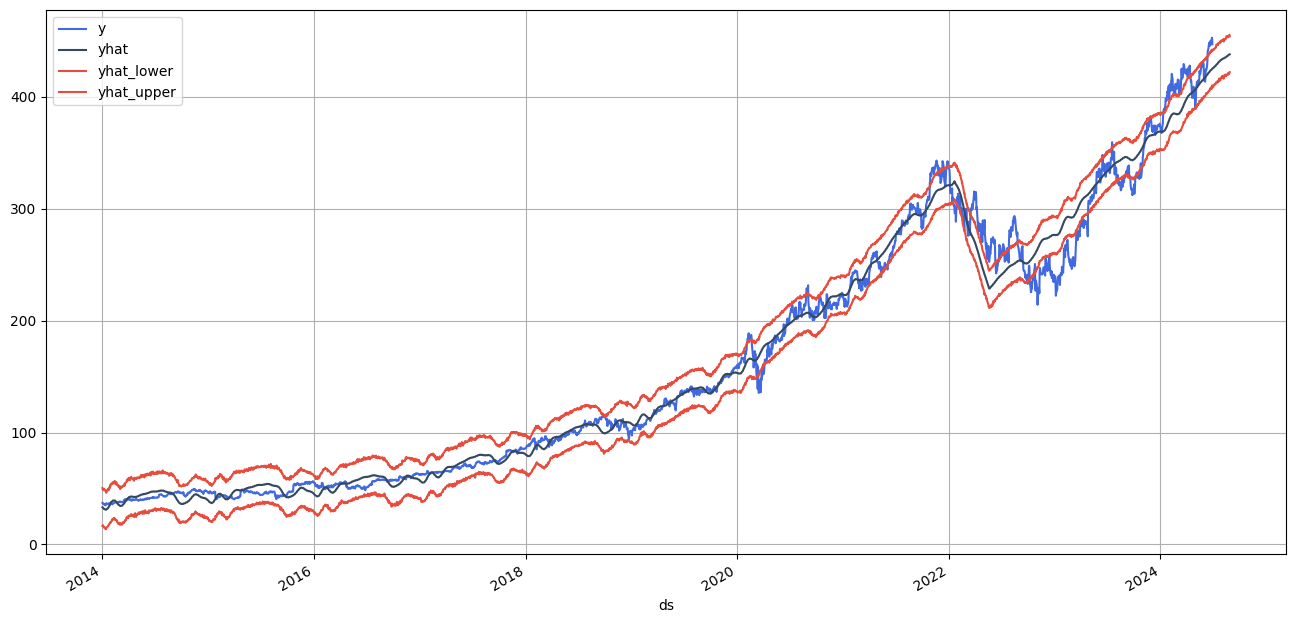

In [ ]:
stock_price_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True);

In [ ]:
stock_price['dayname'] = stock_price['ds'].dt.day_name()
stock_price['month'] = stock_price['ds'].dt.month
stock_price['year'] = stock_price['ds'].dt.year
stock_price['month/year'] = stock_price['month'].map(str) + '/' + stock_price['year'].map(str)

stock_price = pd.merge(stock_price,
                       stock_price['month/year'].drop_duplicates().reset_index(drop=True).reset_index(),
                       on='month/year',
                       how='left')

stock_price = stock_price.rename(columns={'index':'month/year_index'})

In [ ]:
stock_price.tail()


,ds,y,dayname,month,year,month/year,month/year_index
2635,2024-06-24,447.67,Monday,6,2024,6/2024,125
2636,2024-06-25,450.95,Tuesday,6,2024,6/2024,125
2637,2024-06-26,452.16,Wednesday,6,2024,6/2024,125
2638,2024-06-27,452.85,Thursday,6,2024,6/2024,125
2639,2024-06-28,446.95,Friday,6,2024,6/2024,125


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

RMSE: 20.246164670779343
MAPE: 4.101704921114993


<Axes: xlabel='ds'>

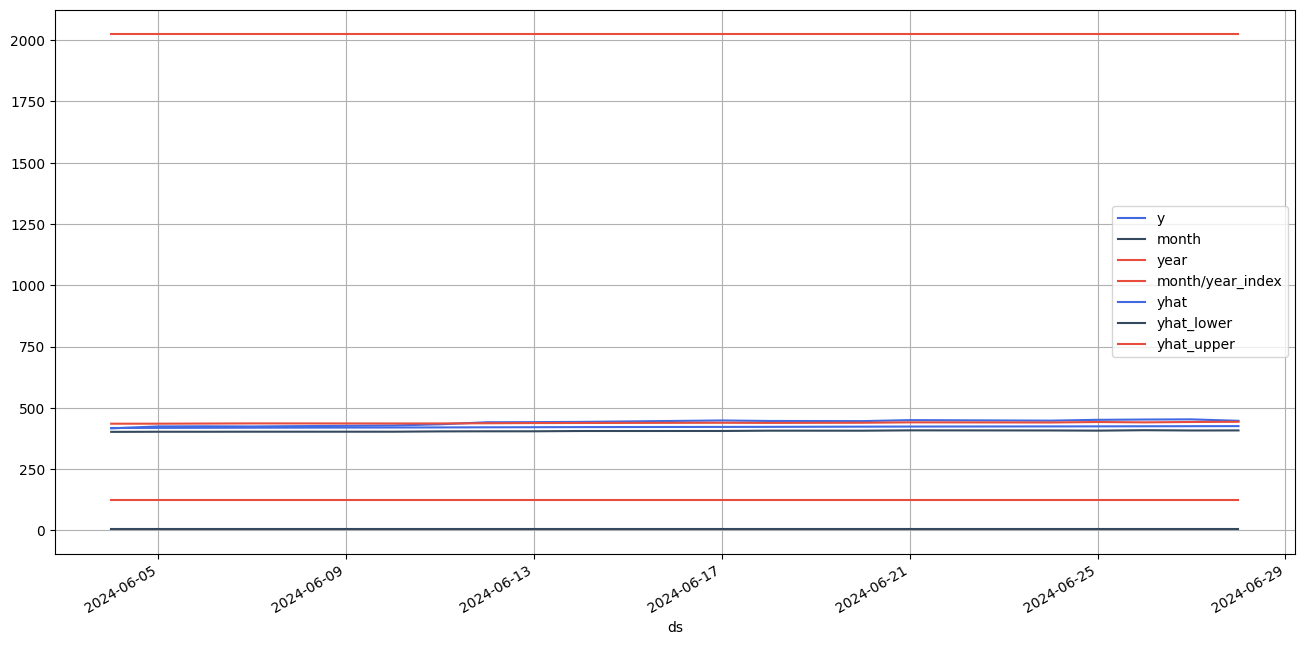

In [ ]:
# Drop rows with NaN values in 'y' or 'yhat'
df_60_days_cleaned = df_60_days.dropna(subset=['y', 'yhat'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df_60_days_cleaned['y'], df_60_days_cleaned['yhat']))

# Calculate MAPE
mape = mean_absolute_percentage_error(df_60_days_cleaned['y'], df_60_days_cleaned['yhat'])

# Display the RMSE and MAPE
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

# Plot the forecast for the next 60 days with cleaned data
df_60_days_cleaned.set_index('ds').plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True)


<Axes: xlabel='ds'>

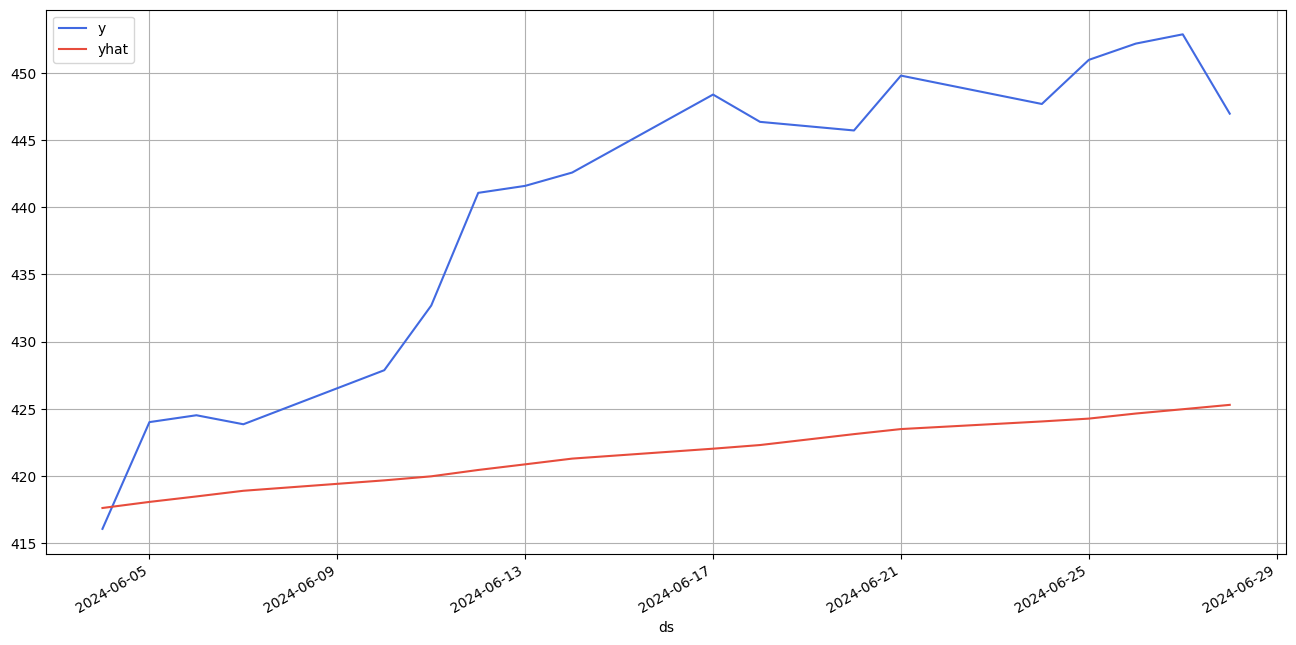

In [ ]:
# Plot only the actual values and the forecasted values
df_60_days_cleaned.set_index('ds')[['y', 'yhat']].plot(figsize=(16,8), color=['royalblue', "#e74c3c"], grid=True)


In [ ]:
# Calculate the predicted direction: 1 if tomorrow's forecasted close is higher than today's forecasted close, otherwise 0
df_60_days_cleaned['direction'] = (df_60_days_cleaned['yhat'].diff() > 0).astype(int)

# Shift the predicted direction to align with the next day's forecast
df_60_days_cleaned['direction'] = df_60_days_cleaned['direction'].shift(-1)

# Calculate the actual direction: 1 if tomorrow's actual close is higher than today's actual close, otherwise 0
df_60_days_cleaned['actual_direction'] = (df_60_days_cleaned['y'].diff() > 0).astype(int)


<Axes: title={'center': 'Predicted Direction vs Actual Direction'}, xlabel='ds'>

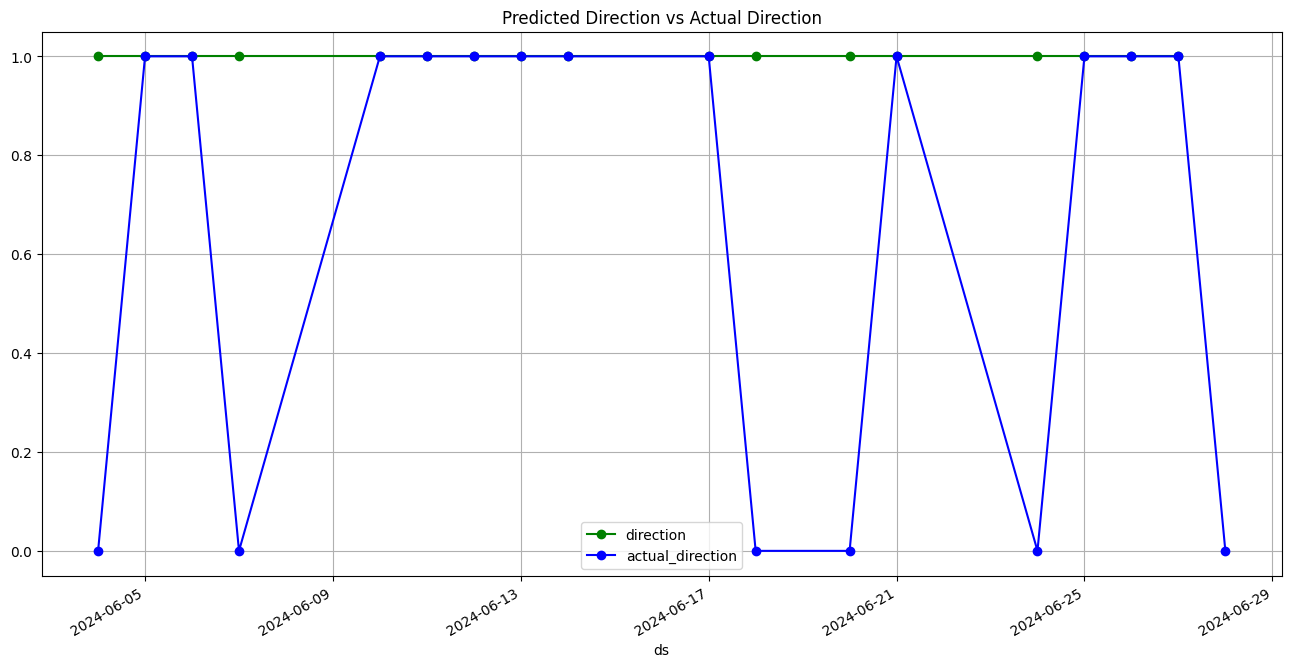

In [ ]:
# Plot the predicted direction and actual direction
df_60_days_cleaned.set_index('ds')[['direction', 'actual_direction']].plot(
    figsize=(16, 8),
    color=["green", "blue"],
    linestyle='-',
    marker='o',
    grid=True,
    title="Predicted Direction vs Actual Direction"
)


In [ ]:
# Calculate actual direction based on 'y' (1 if tomorrow's close is higher than today's, otherwise 0)
df_60_days_cleaned['actual_direction'] = (df_60_days_cleaned['y'].diff() > 0).astype(int)

# Calculate the accuracy of the direction prediction
accuracy = (df_60_days_cleaned['direction'] == df_60_days_cleaned['actual_direction']).mean()

print(f'Direction Prediction Accuracy: {accuracy * 100:.2f}%')


Direction Prediction Accuracy: 66.67%


In [ ]:
loop_list = stock_price['month/year'].unique().tolist()
max_num = len(loop_list) - 1
forecast_frames = []

for num, item in enumerate(loop_list):

    if  num == max_num:
        pass
    else:
        df = stock_price.set_index('ds')[
             stock_price[stock_price['month/year'] == loop_list[0]]['ds'].min():\
             stock_price[stock_price['month/year'] == item]['ds'].max()]

        df = df.reset_index()[['ds', 'y']]

        model = Prophet()
        model.fit(df)

        future = stock_price[stock_price['month/year_index'] == (num + 1)][['ds']]

        forecast = model.predict(future)
        forecast_frames.append(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphuu6o0ms/6v71r3ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphuu6o0ms/n1gvf0a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49555', 'data', 'file=/tmp/tmphuu6o0ms/6v71r3ed.json', 'init=/tmp/tmphuu6o0ms/n1gvf0a4.json', 'output', 'file=/tmp/tmphuu6o0ms/prophet_model3bjcb97n/prophet_model-20240902150823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
stock_price_forecast = reduce(lambda top, bottom: pd.concat([top, bottom], sort=False), forecast_frames)
stock_price_forecast = stock_price_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
stock_price_forecast.to_csv('stock_price_forecast.csv', index=False)

In [ ]:
stock_price_forecast = pd.read_csv('stock_price_forecast.csv', parse_dates=['ds'])


<Axes: xlabel='ds'>

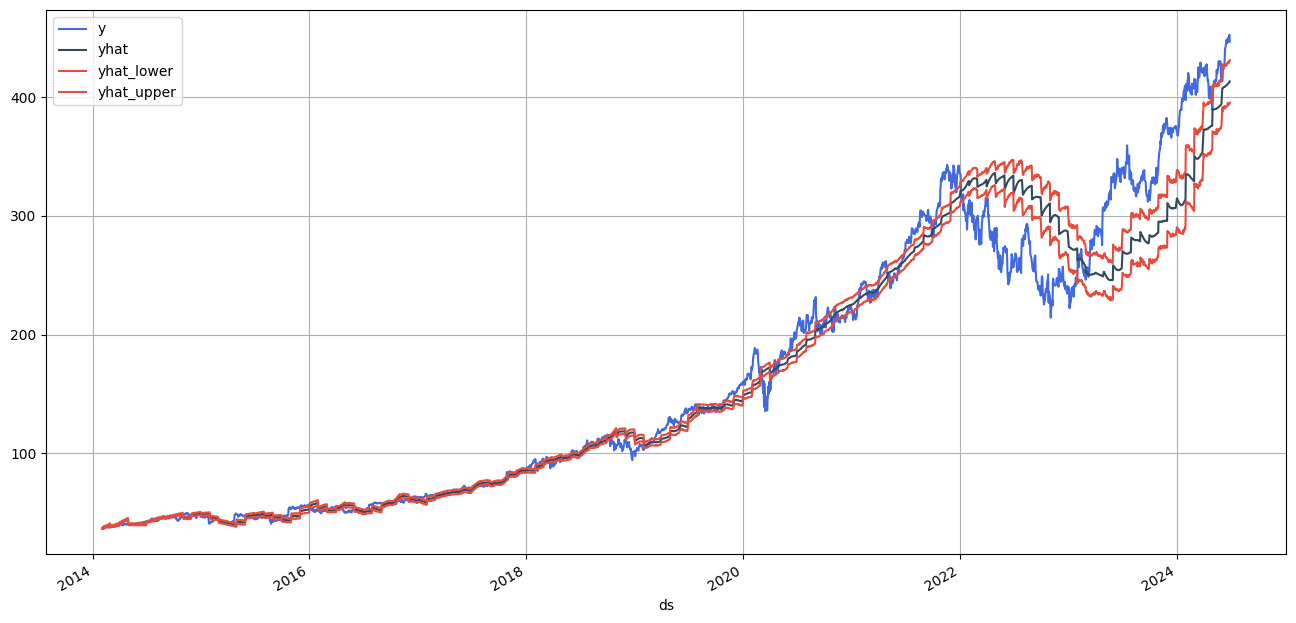

In [ ]:
df = pd.merge(stock_price[['ds','y', 'month/year_index']], stock_price_forecast, on='ds')
df['Percent Change'] = df['y'].pct_change()
df.set_index('ds')[['y', 'yhat', 'yhat_lower', 'yhat_upper']].plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True)

In [ ]:
df.head()


,ds,y,month/year_index,yhat,yhat_lower,yhat_upper,Percent Change
0,2014-02-03,36.48,1,36.55,36.06,37.01,NaN
1,2014-02-04,36.35,1,37.09,36.63,37.57,-0.00
2,2014-02-05,35.82,1,37.28,36.84,37.74,-0.01
3,2014-02-06,36.18,1,37.47,36.98,37.93,0.01
4,2014-02-07,36.56,1,37.85,37.38,38.31,0.01


In [ ]:
df['Hold'] = (df['Percent Change'] + 1).cumprod()
df['Prophet'] = ((df['yhat'].shift(-1) > df['yhat']).shift(1) * (df['Percent Change']) + 1).cumprod()
df['Prophet Thresh']  = ((df['y'] > df['yhat_lower']).shift(1)* (df['Percent Change']) + 1).cumprod()
df['Seasonality'] = ((~df['ds'].dt.month.isin([8,9])).shift(1) * (df['Percent Change']) + 1).cumprod()

Hold = 12,252
Prophet = 4,923
Prophet Thresh = 5,438
Seasonality = 12,913


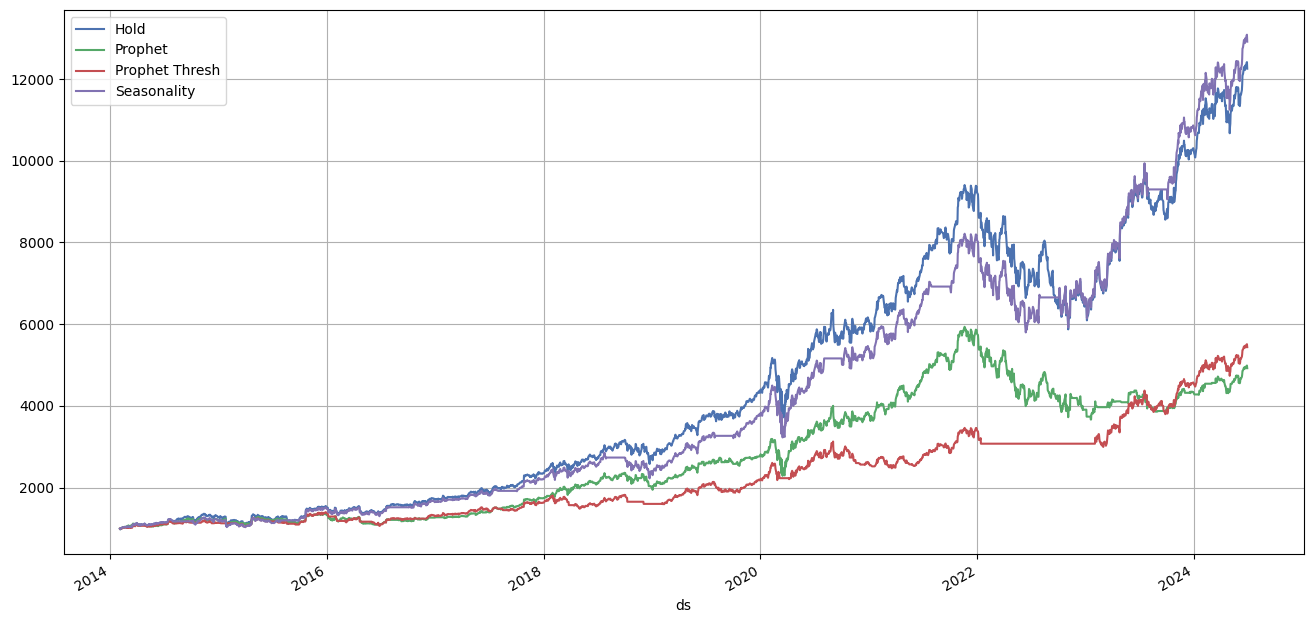

In [ ]:
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh','Seasonality']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")

'Best Yhat = 0.94'

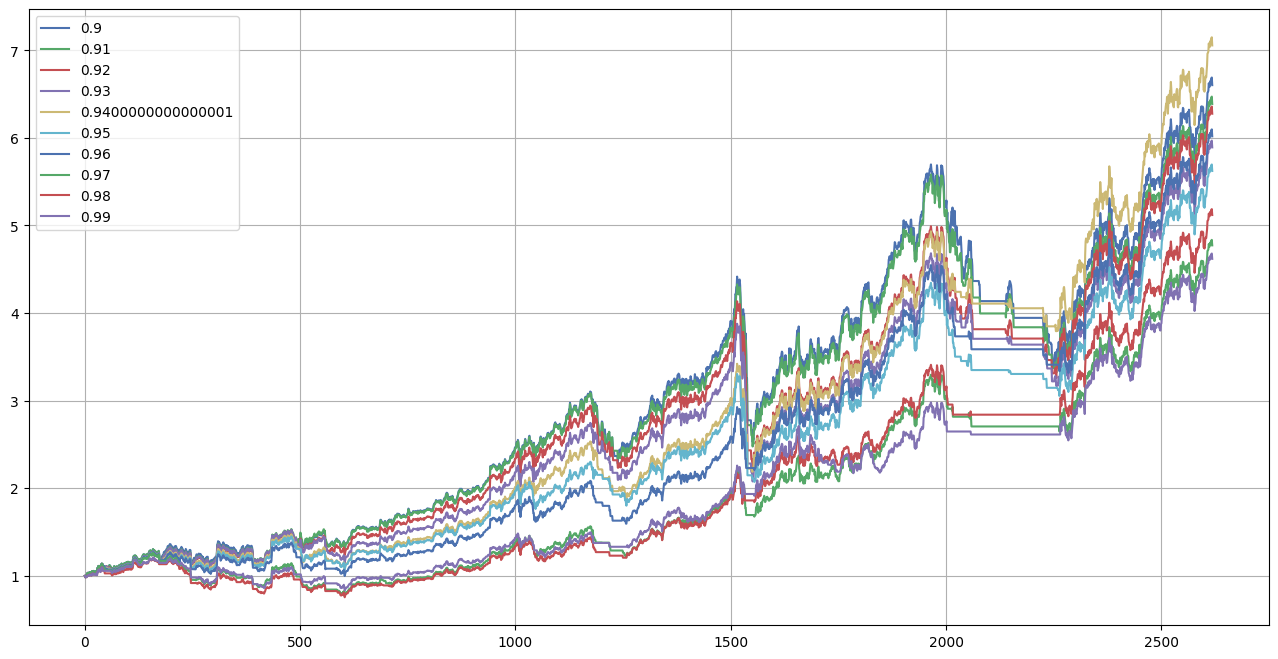

In [ ]:
performance = {}

for x in np.linspace(.9,.99,10):
    y = ((df['y'] > df['yhat_lower']*x).shift(1)* (df['Percent Change']) + 1).cumprod()
    performance[x] = y

best_yhat = pd.DataFrame(performance).max().idxmax()
pd.DataFrame(performance).plot(figsize=(16,8), grid=True);
f'Best Yhat = {best_yhat:,.2f}'

In [ ]:
df['Optimized Prophet Thresh']  = ((df['y'] > df['yhat_lower'] * best_yhat).shift(1) *
                                   (df['Percent Change']) + 1).cumprod()

Hold = 12,252
Prophet = 4,923
Prophet Thresh = 5,438
Seasonality = 12,913
Optimized Prophet Thresh = 7,057


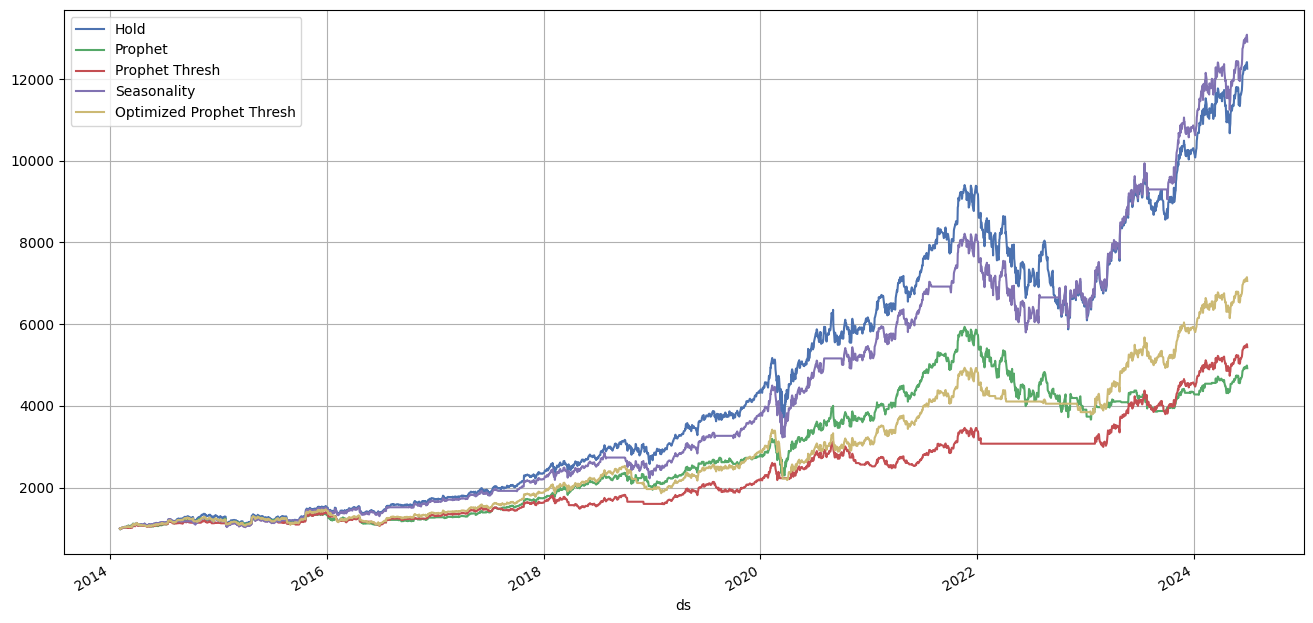

In [ ]:
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Seasonality', 'Optimized Prophet Thresh']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Optimized Prophet Thresh = {df['Optimized Prophet Thresh'].iloc[-1]*1000:,.0f}")

In [ ]:
fcst_thresh = {}

for num, index in enumerate(df['month/year_index'].unique()):

    temp_df = df.set_index('ds')[
         df[df['month/year_index'] == df['month/year_index'].unique()[0]]['ds'].min():\
         df[df['month/year_index'] == index]['ds'].max()]

    performance = {}

    for thresh in np.linspace(0, .99, 100):
        percent =  ((temp_df['y'] > temp_df['yhat_lower'] * thresh).shift(1)* (temp_df['Percent Change']) + 1).cumprod()
        performance[thresh] = percent

    best_thresh = pd.DataFrame(performance).max().idxmax()

    if num == len(df['month/year_index'].unique())-1:
        pass
    else:
        fcst_thresh[df['month/year_index'].unique()[num+1]] = best_thresh

In [ ]:
fcst_thresh = pd.DataFrame([fcst_thresh]).T.reset_index().rename(columns={'index':'month/year_index', 0:'Fcst Thresh'})


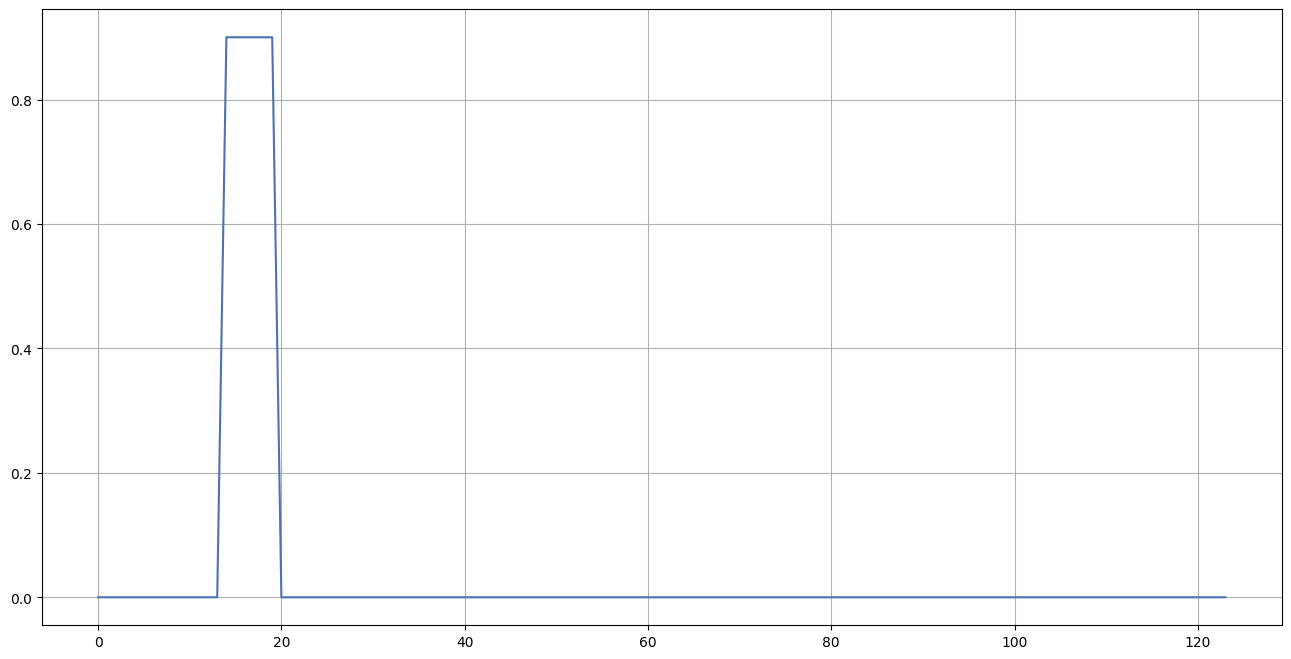

In [ ]:
fcst_thresh['Fcst Thresh'].plot(figsize=(16,8), grid=True);


In [ ]:
df['yhat_optimized'] = pd.merge(df, fcst_thresh,
                                on='month/year_index',
                                how='left')['Fcst Thresh'].shift(1) * df['yhat_lower']

In [ ]:
df['Prophet Fcst Thresh']  = ((df['y'] > df['yhat_optimized']).shift(1)* (df['Percent Change']) + 1).cumprod()


Hold = 12,252
Prophet = 4,923
Prophet Thresh = 5,438
Prophet Fcst Thresh = 11,026


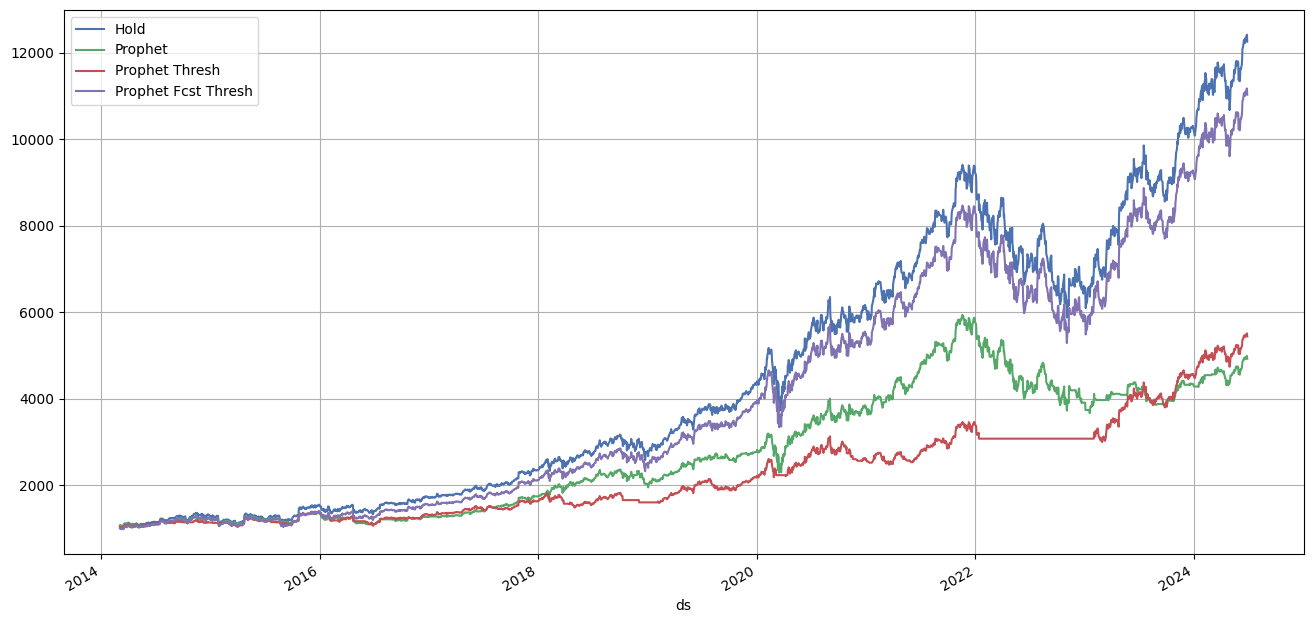

In [ ]:
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Prophet Fcst Thresh']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
# print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Prophet Fcst Thresh = {df['Prophet Fcst Thresh'].iloc[-1]*1000:,.0f}")

In [ ]:
rolling_thresh = {}

for num, index in enumerate(df['month/year_index'].unique()):

    rolling_performance = {}

    for roll in range(10, 400, 10):

        temp_df = df.set_index('ds')[
             df[df['month/year_index'] == index]['ds'].min() - pd.DateOffset(months=roll):\
             df[df['month/year_index'] == index]['ds'].max()]

        performance = {}

        for thresh in np.linspace(.0,.99, 100):
            percent =  ((temp_df['y'] > temp_df['yhat_lower'] * thresh).shift(1)* (temp_df['Percent Change']) + 1).cumprod()
            performance[thresh] = percent

        per_df =  pd.DataFrame(performance)
        best_thresh = per_df.iloc[[-1]].max().idxmax()
        percents = per_df[best_thresh]

        rolling_performance[best_thresh] = percents

    per_df =  pd.DataFrame(rolling_performance)
    best_rolling_thresh = per_df.iloc[[-1]].max().idxmax()

    if num == len(df['month/year_index'].unique())-1:
        pass
    else:
        rolling_thresh[df['month/year_index'].unique()[num+1]] = best_rolling_thresh

In [ ]:
rolling_thresh = pd.DataFrame([rolling_thresh]).T.reset_index().rename(columns={'index':'month/year_index', 0:'Fcst Thresh'})


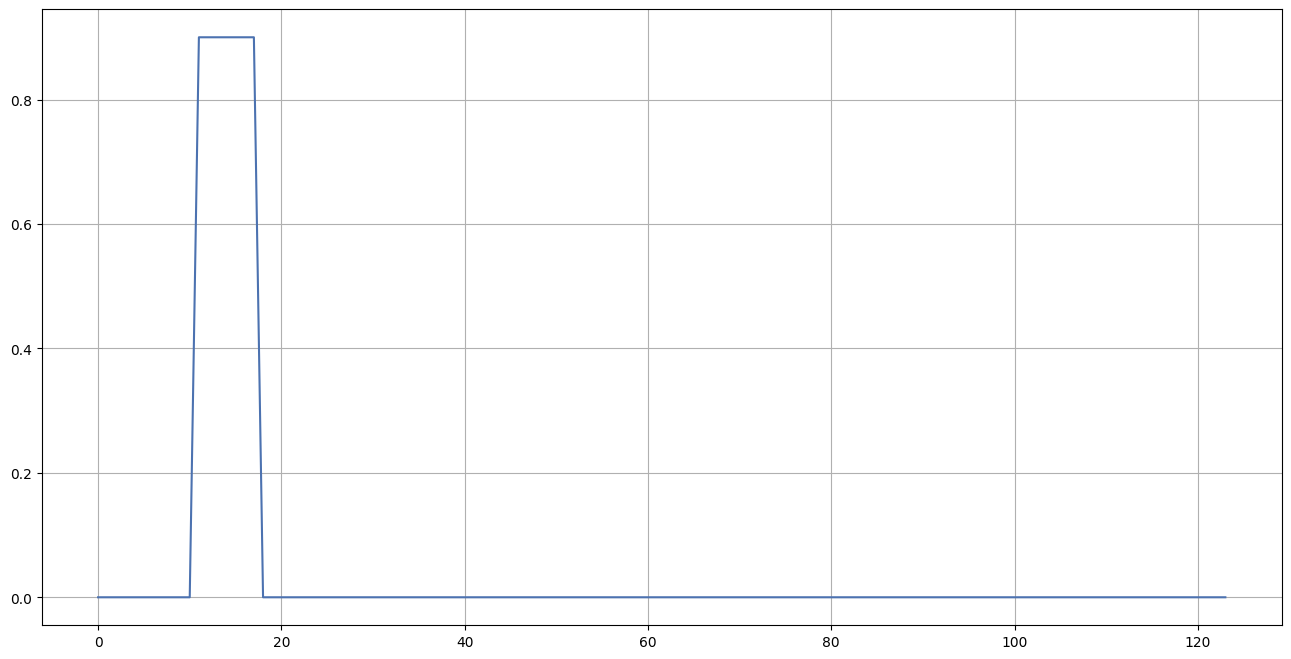

In [ ]:
rolling_thresh['Fcst Thresh'].plot(figsize=(16,8), grid=True);


In [ ]:
df['yhat_optimized'] = pd.merge(df, rolling_thresh,
                                on='month/year_index',
                                how='left')['Fcst Thresh'].fillna(1).shift(1) * df['yhat_lower']

In [ ]:
df['Prophet Rolling Thresh']  = ((df['y'] > df['yhat_optimized']).shift(1)* (df['Percent Change']) + 1).cumprod()


Hold = 12,252
Prophet = 4,923
Prophet Thresh = 5,438
Prophet Fcst Thresh = 11,026
Prophet Rolling Thresh = 11,399


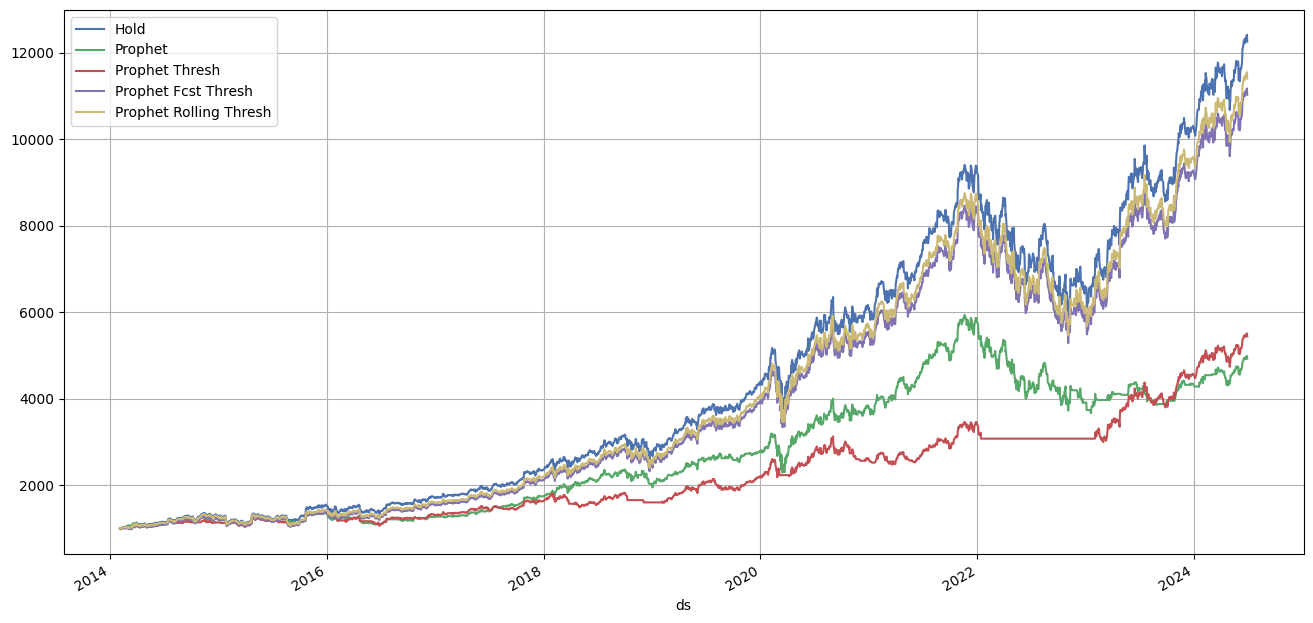

In [ ]:
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Prophet Fcst Thresh', 'Prophet Rolling Thresh']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
# print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Prophet Fcst Thresh = {df['Prophet Fcst Thresh'].iloc[-1]*1000:,.0f}")
print(f"Prophet Rolling Thresh = {df['Prophet Rolling Thresh'].iloc[-1]*1000:,.0f}")

In [ ]:
df['Time Traveler'] = ((df['y'].shift(-1) > df['yhat']).shift(1) * (df['Percent Change']) + 1).cumprod()


Hold = 12,252
Prophet = 4,923
Prophet Thresh = 5,438
Prophet Fcst Thresh = 11,026
Prophet Rolling Thresh = 11,399
Time Traveler = 67,018


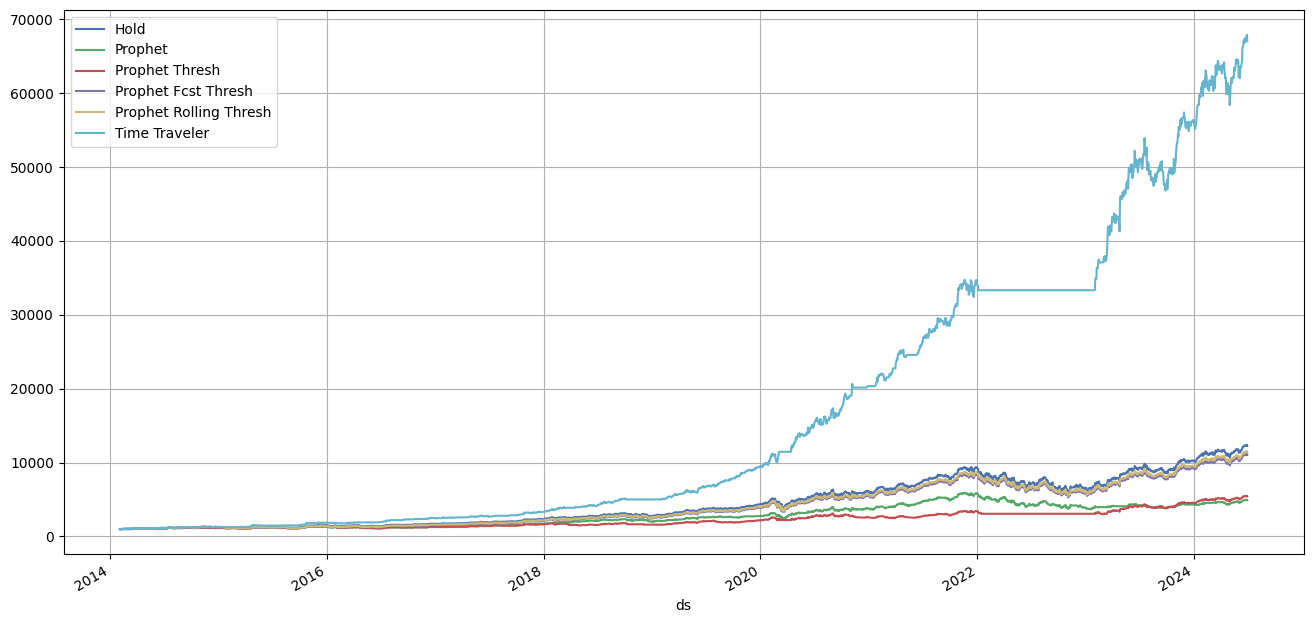

In [ ]:
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Prophet Fcst Thresh', 'Prophet Rolling Thresh',
                              'Time Traveler']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
# print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Prophet Fcst Thresh = {df['Prophet Fcst Thresh'].iloc[-1]*1000:,.0f}")
print(f"Prophet Rolling Thresh = {df['Prophet Rolling Thresh'].iloc[-1]*1000:,.0f}")
print(f"Time Traveler = {df['Time Traveler'].iloc[-1]*1000:,.0f}")